In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, f1_score
import re
from yellowbrick.classifier import confusion_matrix, ROCAUC
import matplotlib.pyplot as plt
import seaborn as sns


from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('../Projeto/data/StudentsPerformance.csv')

In [3]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
data['mean'] = (data['math score']+data['reading score']+data['writing score'])/3
data['mean'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean, dtype: float64

In [5]:
def classing(x):
    if x >= 70:
        return 1
    else:
        return 0

In [6]:
data['mean2'] = data['mean'].apply(lambda x : classing(x))

In [7]:
data.mean2.mean()

0.459

In [8]:
# Creating columns

In [9]:
gender = pd.get_dummies(data['gender'])

In [10]:
race = pd.get_dummies(data['race/ethnicity'])

In [11]:
parental = pd.get_dummies(data['parental level of education'])

In [12]:
lunch  = pd.get_dummies(data['lunch'])

In [13]:
prep = pd.get_dummies(data['test preparation course'])

In [14]:
first = pd.merge(gender,race, on = data.index).drop(columns='key_0')

In [15]:
second = pd.merge(parental, lunch, on = data.index).drop(columns='key_0')

In [16]:
students = pd.merge(first, second, on = first.index).drop(columns='key_0')

In [17]:
students = pd.merge(students, prep, on = students.index).drop(columns = 'key_0')


In [18]:
students.corr()

female      male   group A   group B   group C  \
female              1.000000 -1.000000 -0.071001  0.028466  0.063368   
male               -1.000000  1.000000  0.071001 -0.028466 -0.063368   
group A            -0.071001  0.071001  1.000000 -0.151381 -0.213923   
group B             0.028466 -0.028466 -0.151381  1.000000 -0.331479   
group C             0.063368 -0.063368 -0.213923 -0.331479  1.000000   
group D            -0.030566  0.030566 -0.186234 -0.288574 -0.407797   
group E            -0.020302  0.020302 -0.126110 -0.195411 -0.276145   
associate's degree  0.004835 -0.004835 -0.048658 -0.007238  0.037077   
bachelor's degree   0.011638 -0.011638  0.016307 -0.019121  0.015682   
high school        -0.037952  0.037952  0.004919  0.069093  0.007977   
master's degree     0.046188 -0.046188 -0.033551 -0.056363  0.001630   
some college        0.004460 -0.004460 -0.017751 -0.036203 -0.015872   
some high school   -0.008990  0.008990  0.073921  0.026531 -0.045339   
free/reduced        0.021372 -0.021372  0.032329  0.008257  0.003385   
standard           -0.021372  0.021372 -0.032329 -0.008257 -0.003385   
completed          -0.006028  0.006028 -0.006315 -0.000106  0.012522   
none                0.006028 -0.006028  0.006315  0.000106 -0.012522   

                     group D   group E  associate's degree  bachelor's degree  \
female             -0.030566 -0.020302            0.004835           0.011638   
male                0.030566  0.020302           -0.004835          -0.011638   
group A            -0.186234 -0.126110           -0.048658           0.016307   
group B            -0.288574 -0.195411           -0.007238          -0.019121   
group C            -0.407797 -0.276145            0.037077           0.015682   
group D             1.000000 -0.240402           -0.044674          -0.020556   
group E            -0.240402  1.000000            0.054922           0.013221   
associate's degree -0.044674  0.054922            1.000000          -0.195386   
bachelor's degree  -0.020556  0.013221           -0.195386           1.000000   
high school        -0.042118 -0.039494           -0.263746          -0.180595   
master's degree     0.072793 -0.003180           -0.133757          -0.091588   
some college        0.042347  0.023153           -0.288649          -0.197647   
some high school    0.018402 -0.053075           -0.249426          -0.170790   
free/reduced        0.009458 -0.052398           -0.009102           0.013668   
standard           -0.009458  0.052398            0.009102          -0.013668   
completed          -0.055956  0.059393            0.012668           0.024285   
none                0.055956 -0.059393           -0.012668          -0.024285   

                    high school  master's degree  some college  \
female                -0.037952         0.046188      0.004460   
male                   0.037952        -0.046188     -0.004460   
group A                0.004919        -0.033551     -0.017751   
group B                0.069093        -0.056363     -0.036203   
group C                0.007977         0.001630     -0.015872   
group D               -0.042118         0.072793      0.042347   
group E               -0.039494        -0.003180      0.023153   
associate's degree    -0.263746        -0.133757     -0.288649   
bachelor's degree     -0.180595        -0.091588     -0.197647   
high school            1.000000        -0.123632     -0.266799   
master's degree       -0.123632         1.000000     -0.135305   
some college          -0.266799        -0.135305      1.000000   
some high school      -0.230545        -0.116919     -0.252312   
free/reduced           0.002211         0.027095     -0.006146   
standard              -0.002211        -0.027095      0.006146   
completed             -0.074446        -0.009933     -0.019490   
none                   0.074446         0.009933      0.019490   

                    some high school  free/reduced  standard  completed  \
fe

## Treinando o modelo

In [19]:
X = students
y = data['mean2']

In [20]:
X.head()

female  male  group A  group B  group C  group D  group E  \
0       1     0        0        1        0        0        0   
1       1     0        0        0        1        0        0   
2       1     0        0        1        0        0        0   
3       0     1        1        0        0        0        0   
4       0     1        0        0        1        0        0   

   associate's degree  bachelor's degree  high school  master's degree  \
0                   0                  1            0                0   
1                   0                  0            0                0   
2                   0                  0            0                1   
3                   1                  0            0                0   
4                   0                  0            0                0   

   some college  some high school  free/reduced  standard  completed  none  
0             0                 0             0         1          0     1  
1             1                 0             0         1          1     0  
2             0                 0             0         1          0     1  
3             0                 0             1         0          0     1  
4             1                 0             0         1          0     1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
lr = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
depth = [1,2,4,6,8]
estimators = [1,10,20,30,40,50,100,200,300,400]
for i in lr:
    for j in depth:
        for k in estimators:
            model = LGBMClassifier(n_estimators=k, max_depth=j, lr = i)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print(f'{i}/{j}/{k}---\n{classification_report(y_test, pred)}')

/home/rob/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3/1/1---
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       113
           1       0.00      0.00      0.00        87

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.32      0.56      0.41       200

0.3/1/10---
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       113
           1       0.47      0.25      0.33        87

    accuracy                           0.55       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.53      0.55      0.52       200

0.3/1/20---
              precision    recall  f1-score   support

           0       0.57      0.77      0.66       113
           1       0.46      0.25      0.33        87

    accuracy                           0.55       200
   macro avg       0.52      0.51      0.49       200
weighted avg       0.52      0.55      

0.3/4/200---
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       113
           1       0.56      0.56      0.56        87

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.61      0.62       200

0.3/4/300---
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       113
           1       0.54      0.55      0.55        87

    accuracy                           0.60       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.60      0.60      0.60       200

0.3/4/400---
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       113
           1       0.53      0.52      0.52        87

    accuracy                           0.59       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.59      0.59  

0.1/1/40---
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       113
           1       0.52      0.38      0.44        87

    accuracy                           0.57       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.56      0.57      0.56       200

0.1/1/50---
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       113
           1       0.54      0.41      0.47        87

    accuracy                           0.59       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.59      0.58       200

0.1/1/100---
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       113
           1       0.57      0.53      0.55        87

    accuracy                           0.62       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.62      0.62    

0.1/6/20---
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       113
           1       0.56      0.51      0.53        87

    accuracy                           0.61       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.61      0.61      0.61       200

0.1/6/30---
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       113
           1       0.57      0.53      0.55        87

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.62      0.62       200

0.1/6/40---
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       113
           1       0.56      0.55      0.56        87

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.62     

0.03/2/1---
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       113
           1       0.00      0.00      0.00        87

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.32      0.56      0.41       200

0.03/2/10---
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       113
           1       0.49      0.29      0.36        87

    accuracy                           0.56       200
   macro avg       0.54      0.53      0.51       200
weighted avg       0.54      0.56      0.53       200

0.03/2/20---
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       113
           1       0.51      0.40      0.45        87

    accuracy                           0.57       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.57   

0.03/6/100---
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       113
           1       0.57      0.56      0.57        87

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200

0.03/6/200---
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       113
           1       0.56      0.54      0.55        87

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200

0.03/6/300---
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       113
           1       0.55      0.52      0.53        87

    accuracy                           0.60       200
   macro avg       0.60      0.59      0.60       200
weighted avg       0.60      0.6

0.01/2/50---
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       113
           1       0.56      0.57      0.56        87

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.61      0.62       200

0.01/2/100---
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       113
           1       0.57      0.59      0.58        87

    accuracy                           0.63       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.63      0.63      0.63       200

0.01/2/200---
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       113
           1       0.59      0.57      0.58        87

    accuracy                           0.64       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.64      0.64

0.01/8/40---
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       113
           1       0.54      0.54      0.54        87

    accuracy                           0.60       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.60      0.60      0.60       200

0.01/8/50---
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       113
           1       0.54      0.56      0.55        87

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.60      0.61       200

0.01/8/100---
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       113
           1       0.57      0.60      0.58        87

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63 

0.003/2/400---
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       113
           1       0.57      0.56      0.57        87

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200

0.003/4/1---
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       113
           1       0.71      0.06      0.11        87

    accuracy                           0.58       200
   macro avg       0.64      0.52      0.42       200
weighted avg       0.64      0.58      0.46       200

0.003/4/10---
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       113
           1       0.51      0.40      0.45        87

    accuracy                           0.57       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.5

0.003/8/100---
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       113
           1       0.57      0.60      0.58        87

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200

0.003/8/200---
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       113
           1       0.53      0.51      0.52        87

    accuracy                           0.59       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.59      0.59      0.59       200

0.003/8/300---
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       113
           1       0.52      0.49      0.51        87

    accuracy                           0.58       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      

0.001/4/50---
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       113
           1       0.56      0.56      0.56        87

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0.62      0.62       200

0.001/4/100---
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       113
           1       0.57      0.56      0.57        87

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200

0.001/4/200---
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       113
           1       0.56      0.56      0.56        87

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.62      0

0.001/8/400---
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       113
           1       0.52      0.48      0.50        87

    accuracy                           0.58       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.58      0.58       200



In [23]:
# Treinando o modelo com os melhores par√¢metros:
model1 = LGBMClassifier(n_estimators=250, max_depth=1, lr = 0.03)
model2 = GradientBoostingClassifier(n_estimators=250, max_depth=1, learning_rate = 0.03)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
print(f'LightGBM: {classification_report(y_test, pred1)}')
print(f'GradientBoosting: {classification_report(y_test, pred2)}')

LightGBM:               precision    recall  f1-score   support

           0       0.69      0.72      0.70       113
           1       0.61      0.57      0.59        87

    accuracy                           0.66       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.66      0.65       200

GradientBoosting:               precision    recall  f1-score   support

           0       0.64      0.69      0.67       113
           1       0.56      0.51      0.53        87

    accuracy                           0.61       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.61      0.61      0.61       200



In [24]:
# Analisando o overfitting
pred_ = model1.predict(X_train)
print(f'200/1/0.03---\n{classification_report(y_train, pred_)}')

200/1/0.03---
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       428
           1       0.67      0.62      0.64       372

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



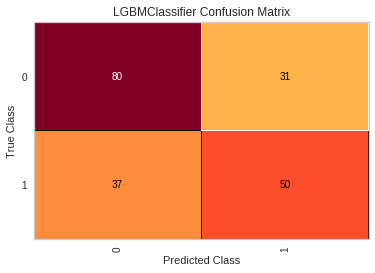

In [25]:
visualizer = confusion_matrix(model1, X_test, y_test, test_size = 0.99)

In [26]:
66/(66+27)

0.7096774193548387

In [27]:
model.feature_importances_

array([966, 344, 326, 463, 916, 790, 412, 622, 453, 472, 287, 605, 452,
       912, 445, 724, 310], dtype=int32)

In [28]:
model.predict_proba(X_test)

array([[0.52892443, 0.47107557],
       [0.32774273, 0.67225727],
       [0.82120737, 0.17879263],
       [0.30892507, 0.69107493],
       [0.97465546, 0.02534454],
       [0.5431332 , 0.4568668 ],
       [0.52892308, 0.47107692],
       [0.06246642, 0.93753358],
       [0.32774273, 0.67225727],
       [0.66528177, 0.33471823],
       [0.62413323, 0.37586677],
       [0.56126244, 0.43873756],
       [0.45157275, 0.54842725],
       [0.41269677, 0.58730323],
       [0.26680349, 0.73319651],
       [0.52295463, 0.47704537],
       [0.16173819, 0.83826181],
       [0.8309835 , 0.1690165 ],
       [0.76439248, 0.23560752],
       [0.86921898, 0.13078102],
       [0.45759481, 0.54240519],
       [0.35717116, 0.64282884],
       [0.65120253, 0.34879747],
       [0.17681416, 0.82318584],
       [0.11883226, 0.88116774],
       [0.04208387, 0.95791613],
       [0.47310022, 0.52689978],
       [0.63963016, 0.36036984],
       [0.59195552, 0.40804448],
       [0.45294317, 0.54705683],
       [0.

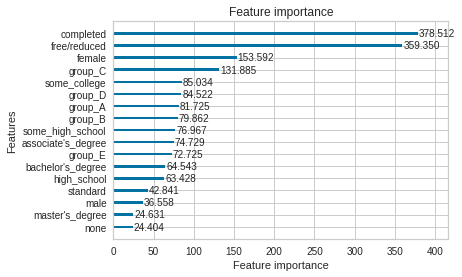

In [29]:
import lightgbm as lgb

lgb.plot_importance(model, importance_type='gain')

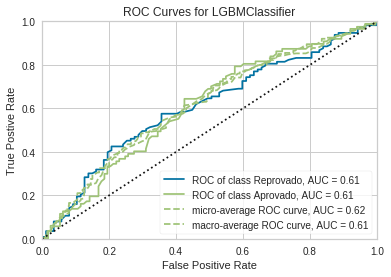

In [30]:
visualizer = ROCAUC(model, classes=["Reprovado", "Aprovado"])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()

In [31]:
from yellowbrick.model_selection import LearningCurve

/home/rob/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


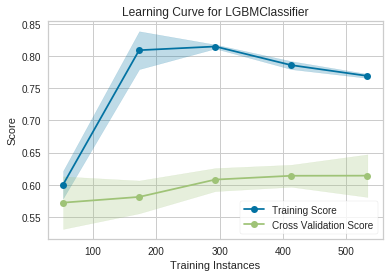

In [32]:
visualizer = LearningCurve(model, scoring='f1_weighted', n_jobs=1)

visualizer.fit(X_train, y_train)       
visualizer.show() 